David Garza Safi | 580768 | IRSI

# LDA y árboles de decisión



En este proyecto, se utiliza la misma base de datos con la que se trabajó en proyectos anteriores, con el objetivo de profundizar en el análisis de regresión logística y la validación cruzada. El propósito principal es aplicar distintas técnicas de modelado y evaluación para identificar cuáles son las variables más relevantes en el estudio, además de explorar enfoques como el Análisis Discriminante Lineal y los Árboles de Decisión. A través de este enfoque, se busca mejorar la predicción y validación del modelo, evaluando su desempeño mediante diversas métricas y analizando cuál es el más adecuado para la tarea específica.

El dataset usado "Hitters.csv" proviene de la biblioteca ISLR, utilizada en el libro "An Introduction to Statistical Learning". También está disponible en plataformas como Kaggle.

Contiene los siguientes datos:

- **AtBat**: Número de veces que un bateador golpeó la pelota durante la temporada 1986-1987.  
- **Hits**: Número total de hits en la temporada 1986-1987.  
- **HmRun**: Número de home runs logrados en la temporada 1986-1987.  
- **Runs**: Número de carreras anotadas para su equipo durante la temporada 1986-1987.  
- **RBI**: Número de veces que un bateador impulsó una carrera mientras bateaba.  
- **Walks**: Número de bases por bolas (BB) obtenidas por el jugador.  
- **Years**: Número de años que el jugador ha jugado en las Grandes Ligas.  
- **CAtBats**: Número total de turnos al bate durante la carrera del jugador.  
- **CHits**: Número total de hits logrados en la carrera del jugador.  
- **CHmRun**: Número total de home runs en la carrera del jugador.  
- **CRuns**: Número total de carreras anotadas durante la carrera del jugador.  
- **CRBI**: Número total de carreras impulsadas por el jugador a lo largo de su carrera.  
- **CWalks**: Número total de bases por bolas concedidas a lo largo de la carrera del jugador.  
- **League**: Liga en la que jugó el jugador hasta el final de la temporada (Categoría: "A" o "N").  
- **Division**: División en la que jugó el jugador al final de la temporada 1986 (Categoría: "E" o "W").  
- **PutOuts**: Número de outs realizados por el jugador en apoyo a su equipo.  
- **Assists**: Número de asistencias realizadas por el jugador durante la temporada 1986-1987.  
- **Errors**: Número de errores cometidos por el jugador en la temporada 1986-1987.  
- **Salary**: Salario del jugador en la temporada 1986-1987 (expresado en miles de dólares).  
- **NewLeague**: Liga en la que jugó el jugador al comienzo de la temporada 1987 (Categoría: "A" o "N").  

##### 1.- Importacion de base de datos

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

# Cargar datos
# Se carga el dataset y se eliminan las filas con valores nulos en 'Salary'.
df = pd.read_csv('Hitters.csv')
df.dropna(subset=['Salary'], inplace=True)

# Transformación de variables categóricas
# Se convierten las variables categóricas en valores numéricos usando Label Encoding.
label_encoders = {}
for col in ['League', 'Division', 'NewLeague']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Definir variables predictoras y objetivo
# Se define la variable objetivo como si el salario es mayor a la mediana.
X = df.drop(columns=['Salary'])
y = (df['Salary'] > df['Salary'].median()).astype(int)


# División de datos
# Se dividen los datos en entrenamiento y prueba con estratificación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



Se eliminan los valores nulos en 'Salary' para evitar problemas en el modelado. Esto asegura que no haya datos faltantes que puedan distorsionar los resultados. La conversión de variables categóricas a numéricas es esencial porque los modelos matemáticos no pueden trabajar directamente con datos categóricos. Se crea un problema de clasificación binaria donde 1 indica un salario alto y 0 un salario bajo. La mediana es un umbral robusto para esta clasificación. La estratificación asegura que la distribución de clases en el conjunto de prueba sea similar a la de entrenamiento.


##### 2.- Se hace una regresión logística simple con la función GLM de statsmodels con todas tus variables de entrada

In [12]:
# Regresión logística con GLM
# Se ajusta un modelo GLM con distribución binomial para analizar la importancia de las variables.
X_train_const = sm.add_constant(X_train)
glm_model = sm.GLM(y_train, X_train_const, family=sm.families.Binomial()).fit()
print(glm_model.summary())

# Selección de variables más relevantes
important_vars = glm_model.pvalues.drop('const').nsmallest(2).index.tolist()
X_train_selected = X_train[important_vars]
X_test_selected = X_test[important_vars]

# ## 6. Análisis Discriminante Lineal (LDA)
# Se entrena un modelo LDA con las variables más importantes.
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_selected, y_train)
y_pred_lda = lda.predict(X_test_selected)



                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Salary   No. Observations:                  210
Model:                            GLM   Df Residuals:                      190
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -77.088
Date:                Mon, 24 Mar 2025   Deviance:                       154.18
Time:                        04:09:14   Pearson chi2:                     267.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4789
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1327      1.204     -4.265      0.0


Se utiliza un modelo de regresión logística para identificar las variables más relevantes basadas en sus valores p. Esto permite reducir la dimensionalidad y mejorar la interpretación. LDA es útil cuando se busca maximizar la separación entre clases. Se usa aquí para evaluar su desempeño con las dos variables más importantes.

##### 3.- Se genera un modelo usando la metodología de linear discriminant analysis.

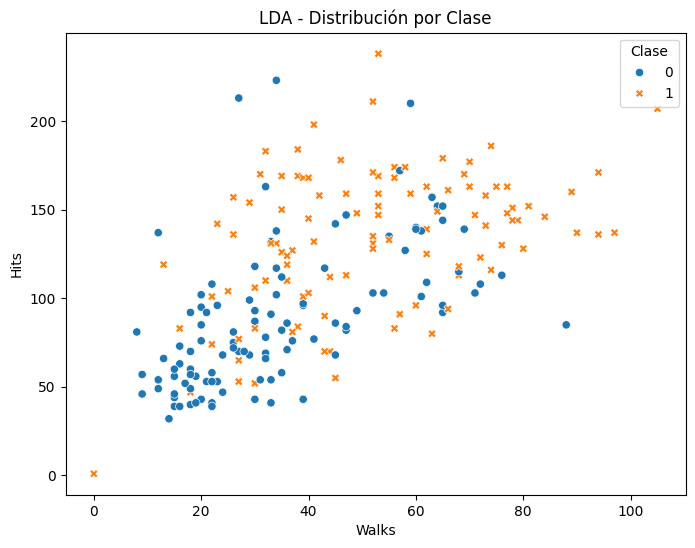

In [ ]:

# Visualización de LDA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_selected.iloc[:, 0], y=X_train_selected.iloc[:, 1], hue=y_train, style=y_train)
plt.xlabel(important_vars[0])
plt.ylabel(important_vars[1])
plt.title('LDA - Distribución por Clase')
plt.legend(title='Clase')
plt.show()

El gráfico muestra cómo se distribuyen los datos en función de las variables seleccionadas y la separación entre clases.


##### 4.- Arbol de Decision

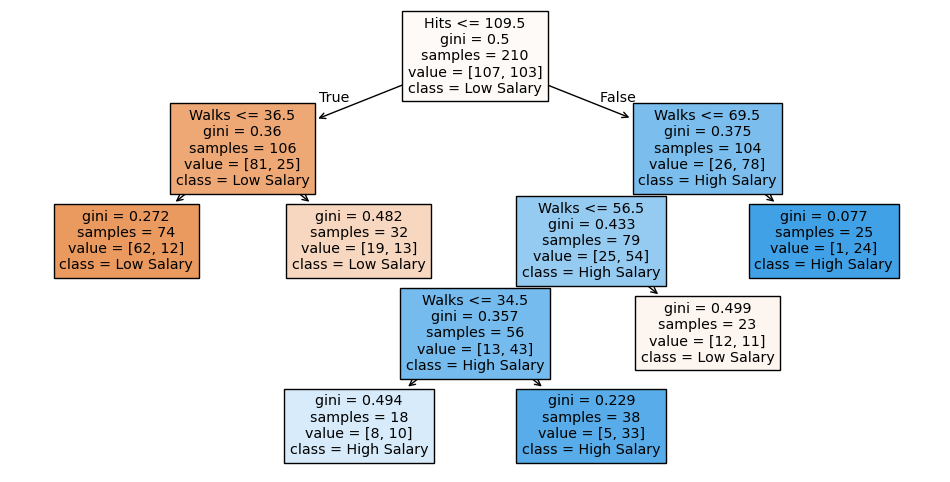

In [13]:
# Árbol de decisión con poda
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_selected, y_train)
alphas = path.ccp_alphas[:-1]
cv_scores = [cross_val_score(DecisionTreeClassifier(ccp_alpha=a, random_state=42), 
                             X_train_selected, y_train, 
                             cv=min(10, len(y_train))).mean() 
             for a in alphas]
optimal_alpha = alphas[np.argmax(cv_scores)]

# Entrenamiento del árbol de decisión
# Se entrena un árbol de decisión con el alpha óptimo.
tree_clf = DecisionTreeClassifier(ccp_alpha=optimal_alpha, random_state=42)
tree_clf.fit(X_train_selected, y_train)

# Visualización del árbol de decisión
plt.figure(figsize=(12, 6))
plot_tree(tree_clf, feature_names=important_vars, class_names=['Low Salary', 'High Salary'], filled=True)
plt.show()


##### 5.- Resultados y Comparacion

In [ ]:
# ## 11. Evaluación de modelos
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f'--- Evaluación del modelo: {name} ---')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Matriz de Confusión:\n', confusion_matrix(y_test, y_pred))
    print('Reporte de Clasificación:\n', classification_report(y_test, y_pred))

evaluate_model(lda, X_test_selected, y_test, 'LDA')
evaluate_model(tree_clf, X_test_selected, y_test, 'Árbol de Decisión')
# Se comparan los modelos en términos de precisión y métricas de clasificación, evaluando su desempeño en el conjunto de prueba.

--- Evaluación del modelo: LDA ---
Accuracy: 0.6037735849056604
Matriz de Confusión:
 [[20  7]
 [14 12]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.59      0.74      0.66        27
           1       0.63      0.46      0.53        26

    accuracy                           0.60        53
   macro avg       0.61      0.60      0.59        53
weighted avg       0.61      0.60      0.60        53

--- Evaluación del modelo: Árbol de Decisión ---
Accuracy: 0.5660377358490566
Matriz de Confusión:
 [[19  8]
 [15 11]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.56      0.70      0.62        27
           1       0.58      0.42      0.49        26

    accuracy                           0.57        53
   macro avg       0.57      0.56      0.56        53
weighted avg       0.57      0.57      0.56        53



El modelo de LDA se desempeña mejor en términos de precisión global, aunque sigue teniendo dificultades para identificar correctamente los salarios altos. Si el objetivo es obtener una mejor tasa de clasificación sin perder interpretabilidad, un árbol de decisión más optimizado o con más datos de entrenamiento podría mejorar los resultados. También podría explorarse el uso de modelos más complejos como Random Forest o SVM para mejorar la capacidad predictiva.

Finalmente, la elección del modelo más adecuado dependerá del contexto. Si se busca una interpretación clara de las reglas de decisión, el árbol de decisión es recomendable. Si el objetivo es maximizar la precisión con un enfoque más estadístico, LDA puede ser la mejor opción.












